In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:15<00:00, 212MB/s]
100% 2.29G/2.29G [00:15<00:00, 159MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Importing Necessary Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import PIL

# Checking Our Data

In [7]:
# chest_xray/train -->training data
# chest_xray/val   -->validation data
# chest_xray/test  -->test data

In [64]:
test_img = PIL.Image.open('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
test_img

Output hidden; open in https://colab.research.google.com to view.

# Making Our Data Ready

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size = (256,256)
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


## Normalizing Our Data

In [5]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image , label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

# Making CNN Model

In [6]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Flatten(),

    layers.Dense(128, activation = 'relu', ),
    layers.Dense(64, activation = 'relu', ),
    layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

### Using Early Stopping To avoid Overfitting

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [9]:
model.fit(
    train_ds,
    epochs = 10,
    validation_data = test_ds,
    callbacks = [early_stopping]
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 265ms/step - accuracy: 0.7926 - loss: 0.5283 - val_accuracy: 0.7756 - val_loss: 0.6749
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 264ms/step - accuracy: 0.9620 - loss: 0.1067 - val_accuracy: 0.7276 - val_loss: 1.0311
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 251ms/step - accuracy: 0.9704 - loss: 0.0817 - val_accuracy: 0.7452 - val_loss: 0.8493
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step - accuracy: 0.9814 - loss: 0.0512 - val_accuracy: 0.7436 - val_loss: 1.0957
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 255ms/step - accuracy: 0.9830 - loss: 0.0399 - val_accuracy: 0.7163 - val_loss: 1.4724
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 264ms/step - accuracy: 0.9870 - loss: 0.0323 - val_accuracy: 0.7548 - val_loss: 0.8835


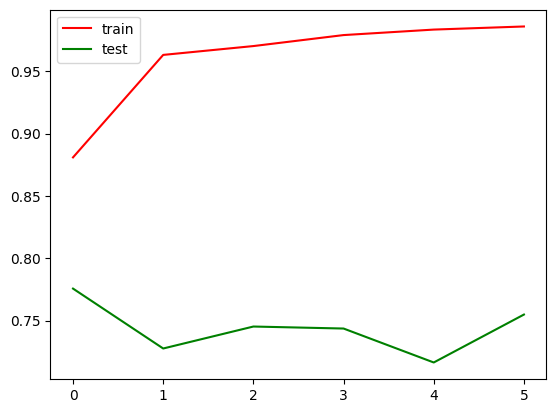

In [10]:
plt.plot(model.history.history['accuracy'], color = 'red', label = 'train')
plt.plot(model.history.history['val_accuracy'], color = 'green', label = 'test')
plt.legend()
plt.show()

Our Data Clearly **Over Fits**

### Using Dropout And Batch Normalization

In [12]:
model_2 = keras.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Flatten(),

    layers.Dense(128, activation = 'relu', ),
    layers.Dropout(0.5),
    layers.Dense(64, activation = 'relu', ),
    layers.Dropout(0.2),
    layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [15]:
model_2.fit(
    train_ds,
    epochs = 10,
    validation_data = test_ds,
    callbacks = [early_stopping]
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 246ms/step - accuracy: 0.8018 - loss: 3.4636 - val_accuracy: 0.6250 - val_loss: 48.9309
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - accuracy: 0.8703 - loss: 0.3110 - val_accuracy: 0.6250 - val_loss: 50.4075
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 258ms/step - accuracy: 0.8705 - loss: 0.2617 - val_accuracy: 0.6250 - val_loss: 41.6107
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 49s 301ms/step - accuracy: 0.8776 - loss: 0.3880 - val_accuracy: 0.6603 - val_loss: 6.5711
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 254ms/step - accuracy: 0.8528 - loss: 0.3380 - val_accuracy: 0.7308 - val_loss: 5.1353


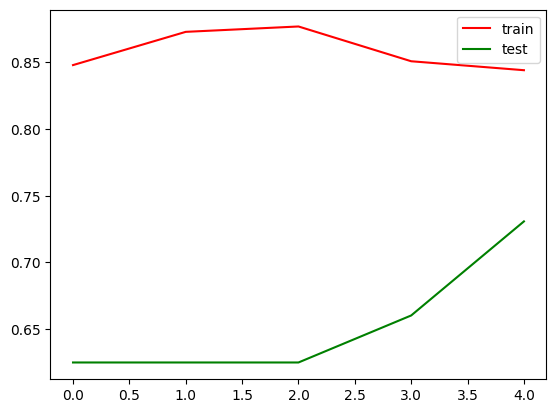

In [16]:
plt.plot(model_2.history.history['accuracy'], color = 'red', label = 'train')
plt.plot(model_2.history.history['val_accuracy'], color = 'green', label = 'test')
plt.legend()
plt.show()

Our model Overfits more, situation of our model is worst now

### Using Only DropOut Layer

In [17]:
model_3 = keras.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Flatten(),

    layers.Dense(128, activation = 'relu', ),
    layers.Dropout(0.3),
    layers.Dense(64, activation = 'relu', ),
    layers.Dropout(0.2),
    layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [19]:
model_3.fit(
    train_ds,
    epochs = 10,
    validation_data = test_ds,
    callbacks = [early_stopping]
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.8089 - loss: 0.4719 - val_accuracy: 0.7115 - val_loss: 1.1475
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 252ms/step - accuracy: 0.9578 - loss: 0.1119 - val_accuracy: 0.7067 - val_loss: 1.0825
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 40s 245ms/step - accuracy: 0.9712 - loss: 0.0925 - val_accuracy: 0.7228 - val_loss: 1.2273
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 272ms/step - accuracy: 0.9744 - loss: 0.0630 - val_accuracy: 0.7484 - val_loss: 1.0157
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - accuracy: 0.9824 - loss: 0.0466 - val_accuracy: 0.7003 - val_loss: 1.8570


 This also Clearly Overfits

# Using Image Generator

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255.0
)

In [21]:
train_generator = train_datagen.flow_from_directory(
    '/content/chest_xray/train',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/chest_xray/test',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [23]:
model_4 = keras.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (256,256,3)),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2) ,strides=2, padding = 'valid'),

    layers.Flatten(),

    layers.Dropout(0.5),
    layers.Dense(128, activation = 'relu', ),
    layers.Dense(64, activation = 'relu', ),
    layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model_4.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics =['accuracy'])

In [25]:
model_4.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 759ms/step - accuracy: 0.7277 - loss: 0.5997 - val_accuracy: 0.7965 - val_loss: 0.4284
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 727ms/step - accuracy: 0.8432 - loss: 0.3596 - val_accuracy: 0.8237 - val_loss: 0.4220
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 125s 742ms/step - accuracy: 0.8748 - loss: 0.2910 - val_accuracy: 0.8029 - val_loss: 0.6090
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 736ms/step - accuracy: 0.8997 - loss: 0.2448 - val_accuracy: 0.8045 - val_loss: 0.4731
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 732ms/step - accuracy: 0.9174 - loss: 0.2149 - val_accuracy: 0.8638 - val_loss: 0.3495
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 124s 729ms/step - accuracy: 0.9206 - loss: 0.2089 - val_accuracy: 0.8766 - val_loss: 0.3708
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 738ms/step - accuracy: 0.9247 - loss: 0.1850 - val_accuracy: 0.8173 - val_loss: 0.6571
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 727ms/step - accuracy: 0.9359 - loss: 0.16

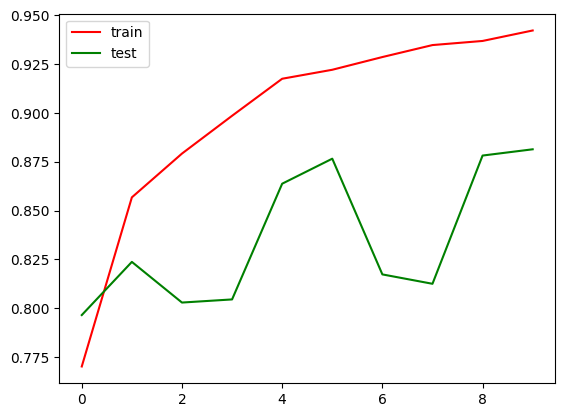

In [26]:
plt.plot(model_4.history.history['accuracy'], color = 'red', label = 'train')
plt.plot(model_4.history.history['val_accuracy'], color = 'green', label = 'test')
plt.legend()
plt.show()

This is working fine for our predictions

# Test Our Model On Unseen Data

In [60]:
#normal_img
from tensorflow.keras.utils import img_to_array
import numpy as np

test_img = PIL.Image.open('/content/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg')
test_img = test_img.convert("RGB")
test_img = test_img.resize((256, 256))

# Convert the image to a NumPy array and scale pixel values
test_img_array = img_to_array(test_img)  # Shape: (256, 256, 3)
test_img_array = np.expand_dims(test_img_array, axis=0)  # Add batch dimension: (1, 256, 256, 3)
test_img_array = test_img_array / 255.0  # Rescale pixel values to [0, 1]

# Predict with the model
prediction = model_4.predict(test_img_array)
if(prediction<0.5):
  print('Normal', prediction)
else:
  print("Pneumina", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Normal [[0.23823874]]


In [61]:
#Pneumonia
from tensorflow.keras.utils import img_to_array
import numpy as np

test_img_2 = PIL.Image.open('/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')
test_img_2 = test_img_2.convert("RGB")
test_img_2 = test_img_2.resize((256, 256))

# Convert the image to a NumPy array and scale pixel values
test_img_array_2 = img_to_array(test_img_2)  # Shape: (256, 256, 3)
test_img_array_2 = np.expand_dims(test_img_array_2, axis=0)  # Add batch dimension: (1, 256, 256, 3)
test_img_array_2 = test_img_array_2 / 255.0  # Rescale pixel values to [0, 1]

# Predict with the model
prediction_2 = model_4.predict(test_img_array_2)
if(prediction_2 < 0.5):
  print('Normal', prediction_2)
else:
  print("Pneumina", prediction_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Pneumina [[0.99911803]]


Our model is working fine, we can make it more accurate, increase val_accuracy by making some changes but at this level its enough for us

In [63]:
# Saving the entire model
model_4.save("CNN_model.keras")
